# Exploratory data analysis

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
# load data
dataset = pd.read_csv(f"{data_path}/preprocessed_heart.csv")
dataset.head().T

0      1      2      3      4
age               63.0   37.0   41.0   56.0   57.0
sex                1.0    1.0    0.0    1.0    0.0
chest_pain         3.0    2.0    1.0    1.0    0.0
rest_bp          145.0  130.0  130.0  120.0  120.0
chol             233.0  250.0  204.0  236.0  354.0
fast_bld_sugar     1.0    0.0    0.0    0.0    0.0
rest_ecg           0.0    1.0    0.0    1.0    1.0
max_hr           150.0  187.0  172.0  178.0  163.0
ex_angina          0.0    0.0    0.0    0.0    1.0
st_depr            2.3    3.5    1.4    0.8    0.6
slope              0.0    0.0    2.0    2.0    2.0
colored_vessels    0.0    0.0    0.0    0.0    0.0
thalassemia        1.0    2.0    2.0    2.0    2.0
target             1.0    1.0    1.0    1.0    1.0

<a id="plotting"></a>
## Plotting distributions and relationships

### Plotting the Distributions and Relationships Between Specific Features

In [4]:
sns.set(
    palette="pastel",
    rc={
        "figure.figsize": (16, 10),
        "axes.titlesize": 18,
        "axes.labelsize": 16,
        "xtick.labelsize": 14,
        "ytick.labelsize": 16,
    },
)

Text(0.5, 0, 'Age')

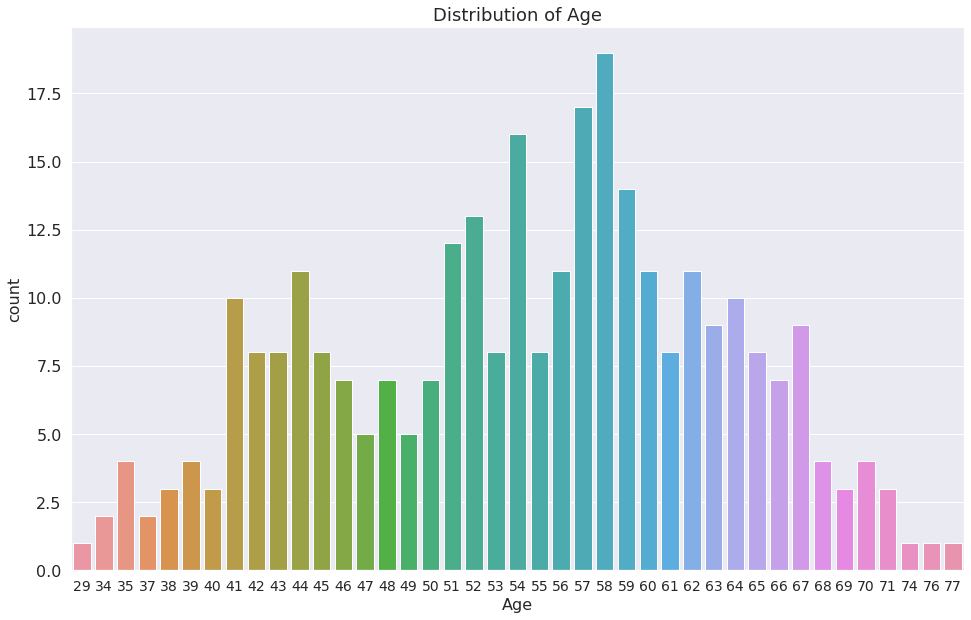

In [5]:
g = sns.countplot(x="age", data=dataset)
g.set_title("Distribution of Age")
plt.xlabel("Age")

In [6]:
print(dataset["target"].value_counts())
print()
print(dataset["target"].value_counts(normalize=True))

1    165
0    138
Name: target, dtype: int64

1    0.544554
0    0.455446
Name: target, dtype: float64


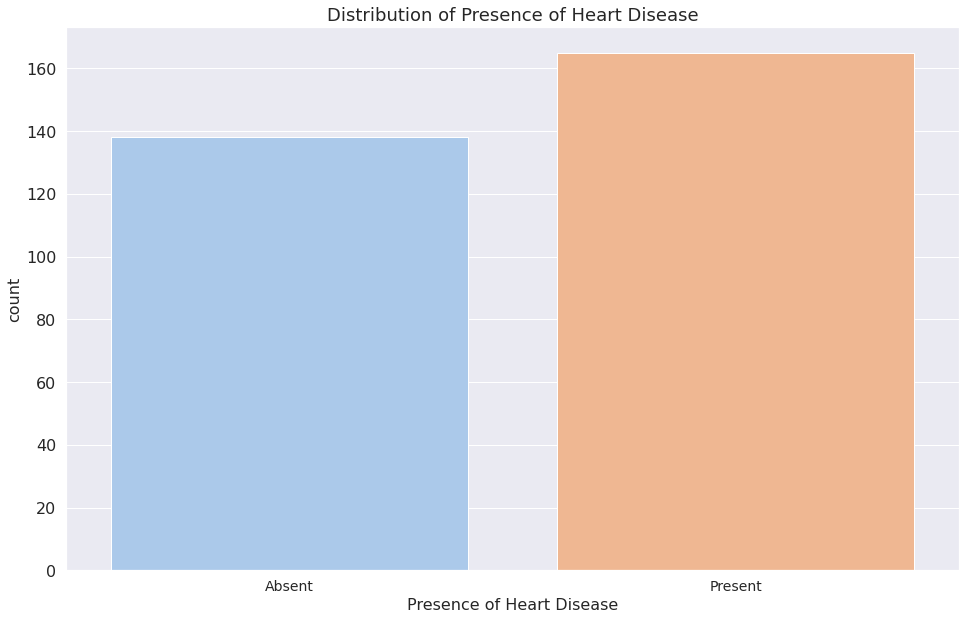

In [7]:
a = sns.countplot(x="target", data=dataset)
a.set_title("Distribution of Presence of Heart Disease")
a.set_xticklabels(["Absent", "Present"])
plt.xlabel("Presence of Heart Disease")
plt.show()

In [8]:
print(dataset["sex"].value_counts())
print()
print(dataset["sex"].value_counts(normalize=True))

1    207
0     96
Name: sex, dtype: int64

1    0.683168
0    0.316832
Name: sex, dtype: float64


In [9]:
b = sns.countplot(x="target", data=dataset, hue="sex")
plt.legend(["Female", "Male"])
b.set_title("Distribution of Presence of Heart Disease by Sex")
b.set_xticklabels(["Absent", "Present"])
plt.show()

### Plotting Distributions and Relationships between Columns with Respect to the Target Column

In [10]:
print(dataset["chest_pain"].value_counts())
print()
print(dataset["chest_pain"].value_counts(normalize=True))

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

0    0.471947
2    0.287129
1    0.165017
3    0.075908
Name: chest_pain, dtype: float64


In [11]:
c = sns.countplot(x="chest_pain", data=dataset, hue="target")
plt.legend(["Absent", "Present"])
c.set_title("Distribution of Presence of Heart Disease by Chest Pain Type")
c.set_xticklabels(
    ["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"]
)
plt.show()

In [12]:
print(dataset["colored_vessels"].value_counts())
print()
print(dataset["colored_vessels"].value_counts(normalize=True))

0    175
1     65
2     38
3     20
4      5
Name: colored_vessels, dtype: int64

0    0.577558
1    0.214521
2    0.125413
3    0.066007
4    0.016502
Name: colored_vessels, dtype: float64


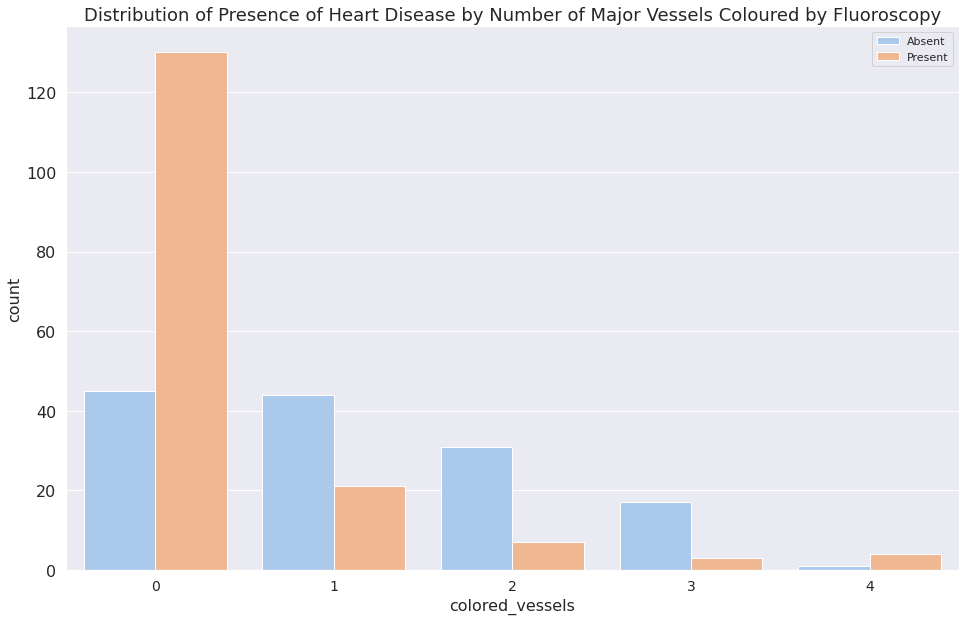

In [13]:
d = sns.countplot(x="colored_vessels", data=dataset, hue="target")
plt.legend(["Absent", "Present"])
d.set_title(
    "Distribution of Presence of Heart Disease by Number of Major "
    "Vessels Coloured by Fluoroscopy"
)
plt.show()

In [14]:
print(dataset["slope"].value_counts())
print()
print(dataset["slope"].value_counts(normalize=True))

2    142
1    140
0     21
Name: slope, dtype: int64

2    0.468647
1    0.462046
0    0.069307
Name: slope, dtype: float64


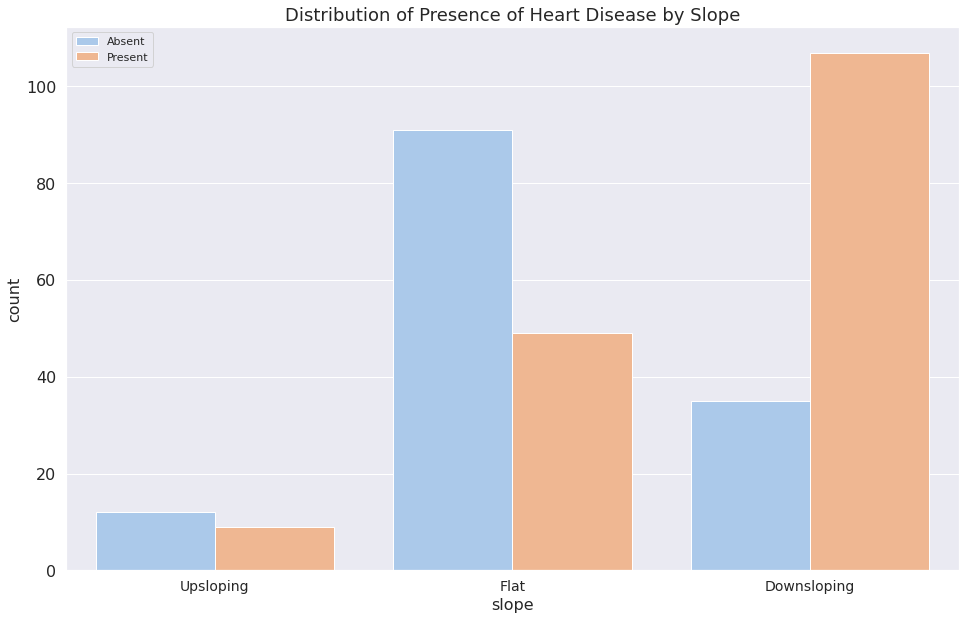

In [15]:
f = sns.countplot(x="slope", data=dataset, hue="target")
plt.legend(["Absent", "Present"])
f.set_title("Distribution of Presence of Heart Disease by Slope")
f.set_xticklabels(["Upsloping", "Flat", "Downsloping"])
plt.show()

### Plotting the Relationship between the Presence of Heart Disease and Maximum Recorded Heart Rate

In [16]:
# Plotting the Relationship between the Presence of Heart Disease and
# Maximum Recorded Heart Rate
sns.set(
    style="whitegrid",
    palette="colorblind",
    rc={
        "figure.figsize": (12, 8),
        "axes.titlesize": 18,
        "axes.labelsize": 16,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
    },
)

Text(0, 0.5, 'Maximum Heart Rate')

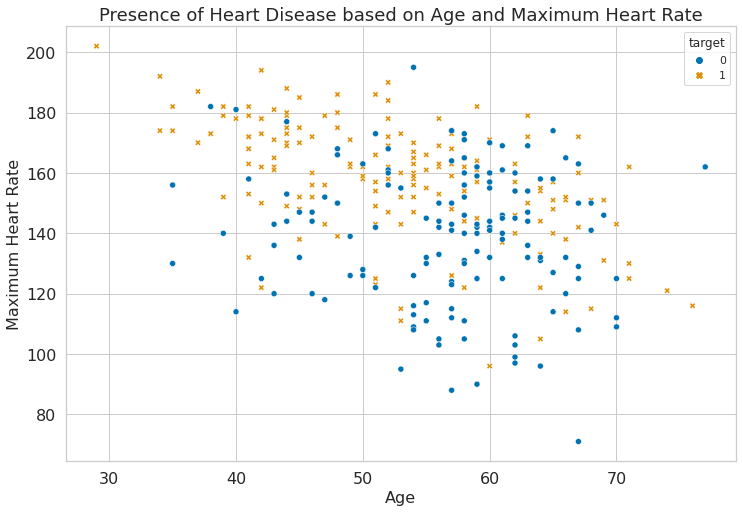

In [17]:
f = sns.scatterplot(
    x="age", y="max_hr", hue="target", style="target", data=dataset
)
f.set_title("Presence of Heart Disease based on Age and Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")

Text(0, 0.5, 'Count')

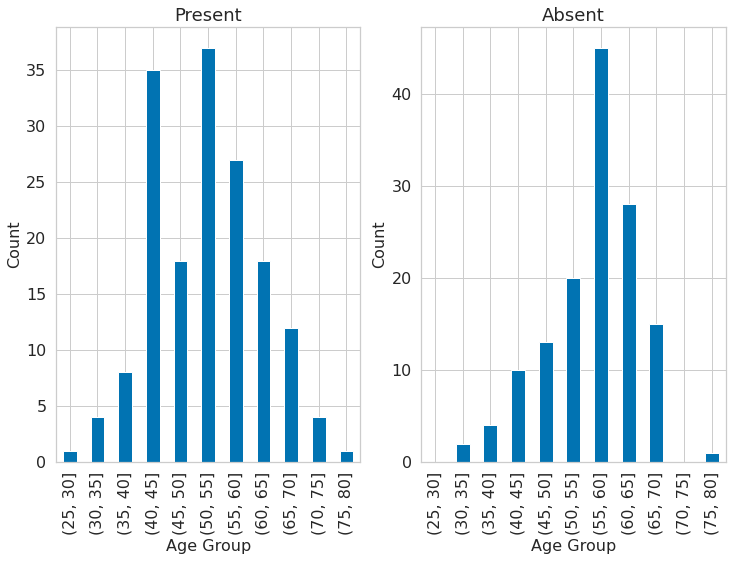

In [18]:
dataset["age_category"] = pd.cut(dataset.age, bins=list(np.arange(25, 85, 5)))

plt.subplot(121)
dataset[dataset.target == 1].groupby("age_category")["age"].count().plot(
    kind="bar"
)
plt.title("Present")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.subplot(122)
dataset[dataset.target == 0].groupby("age_category")["age"].count().plot(
    kind="bar"
)
plt.title("Absent")
plt.xlabel("Age Group")
plt.ylabel("Count")

### Plotting the Relationship between the Presence of Heart Disease and the Cholesterol Column

Text(0, 0.5, 'Cholesterol')

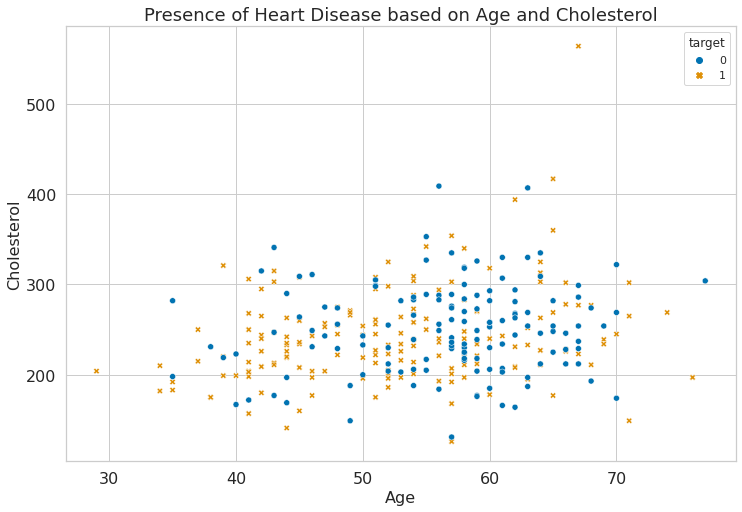

In [19]:
g = sns.scatterplot(
    x="age", y="chol", hue="target", style="target", data=dataset
)
g.set_title("Presence of Heart Disease based on Age and Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")

Text(0, 0.5, 'Count')

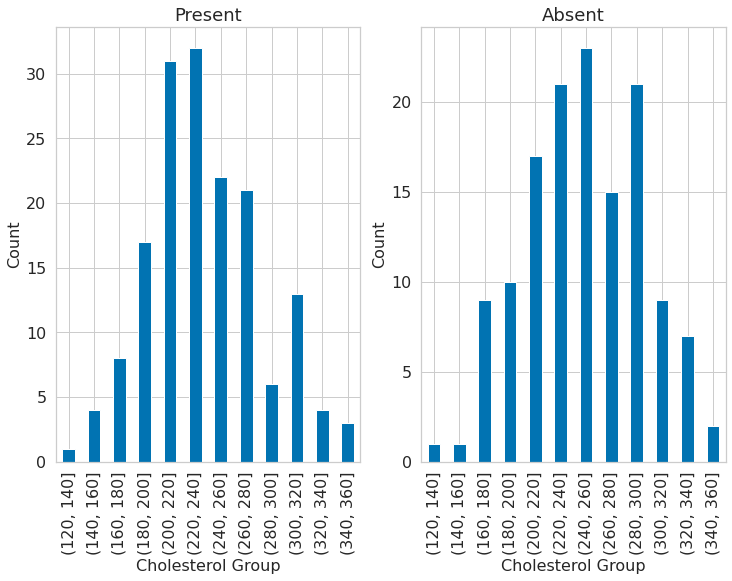

In [20]:
dataset["chol_cat"] = pd.cut(dataset.chol, bins=list(np.arange(120, 380, 20)))
dataset["chol_cat"] = pd.cut(dataset.chol, bins=list(np.arange(120, 380, 20)))

plt.subplot(121)
dataset[dataset.target == 1].groupby("chol_cat")["chol"].count().plot(
    kind="bar"
)
plt.title("Present")
plt.xlabel("Cholesterol Group")
plt.ylabel("Count")

plt.subplot(122)
dataset[dataset.target == 0].groupby("chol_cat")["chol"].count().plot(
    kind="bar"
)
plt.title("Absent")
plt.xlabel("Cholesterol Group")
plt.ylabel("Count")